Final spin configuration: [ 1. -1. -1.  1.]
Max cut value: 7
Convergence achieved in 56 iterations
Set A: [0, 3]
Set B: [1, 2]


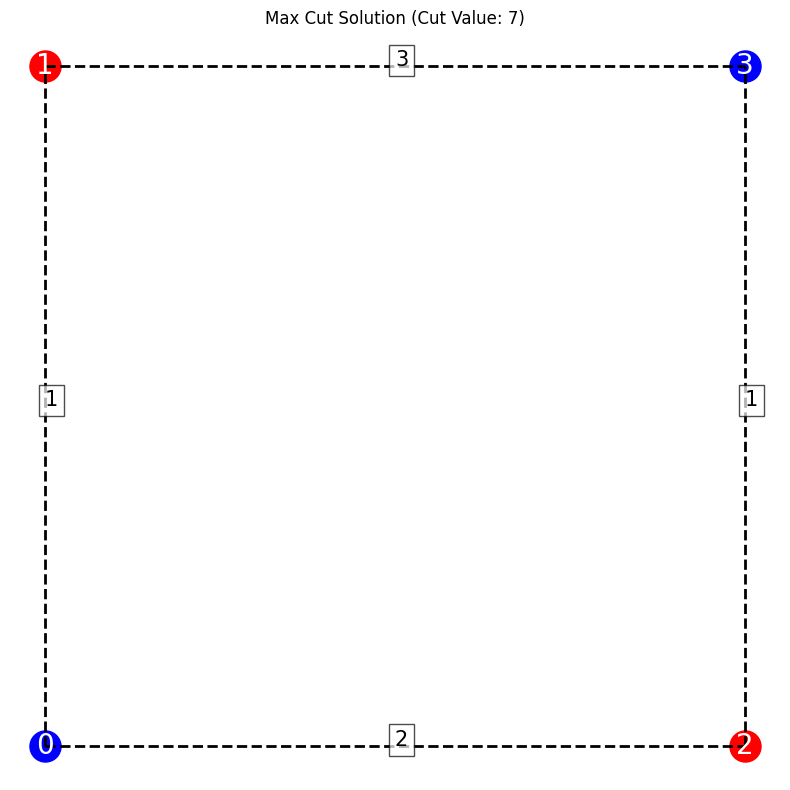

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define our example graph
num_nodes = 4
J = np.array([
    [0, 1, 2, 0],
    [1, 0, 0, 3],
    [2, 0, 0, 1],
    [0, 3, 1, 0]
])

# Initialize DSB variables
x = np.zeros(num_nodes)  # Spin variables
p = np.random.uniform(-0.02, 0.02, num_nodes)  # Momentum variables

# Set algorithm parameters
alpha_init = 0.1  # Initial bifurcation parameter
alpha_max = 1.0   # Maximum bifurcation parameter
alpha_step = 0.01  # Step size for increasing alpha
dt = 0.1          # Time step
max_iterations = 1000

# Store history for visualization
history_x = [x.copy()]
history_p = [p.copy()]
history_alpha = [alpha_init]

# Run DSB algorithm
alpha = alpha_init
iteration = 0
converged = False

while not converged and iteration < max_iterations:
    # Calculate forces (negative gradient of Hamiltonian)
    forces = np.zeros(num_nodes)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if J[i, j] != 0:
                forces[i] += J[i, j] * x[j]
    
    # Update momentum variables
    p = p - dt * forces
    
    # Update spin variables with discretization
    for i in range(num_nodes):
        if p[i] > 0:
            x[i] = min(1.0, x[i] + dt * p[i] * (1.0 - x[i]**2))
        else:
            x[i] = max(-1.0, x[i] + dt * p[i] * (1.0 - x[i]**2))
    
    # Store history
    history_x.append(x.copy())
    history_p.append(p.copy())
    history_alpha.append(alpha)
    
    # Check convergence (all spins close to +1 or -1)
    if np.all(np.abs(x) > 0.99):
        converged = True
    
    # Increase bifurcation parameter
    if iteration % 10 == 0 and alpha < alpha_max:
        alpha += alpha_step
    
    iteration += 1

# Get final discrete solution
final_spins = np.sign(x)
print(f"Final spin configuration: {final_spins}")

# Calculate cut value
cut_value = 0
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if J[i, j] != 0 and final_spins[i] != final_spins[j]:
            cut_value += J[i, j]

print(f"Max cut value: {cut_value}")
print(f"Convergence achieved in {iteration} iterations")

# Determine node sets
set_A = [i for i, spin in enumerate(final_spins) if spin > 0]
set_B = [i for i, spin in enumerate(final_spins) if spin < 0]
print(f"Set A: {set_A}")
print(f"Set B: {set_B}")

# Visualize the evolution of spin variables
plt.figure(figsize=(12, 8))

# Plot spin variables
plt.subplot(2, 1, 1)
history_x_array = np.array(history_x)
for i in range(num_nodes):
    plt.plot(history_x_array[:, i], label=f'Node {i}')
plt.xlabel('Iteration')
plt.ylabel('Spin Value (x)')
plt.title('Evolution of Spin Variables')
plt.legend()
plt.grid(True)

# Plot momentum variables
plt.subplot(2, 1, 2)
history_p_array = np.array(history_p)
for i in range(num_nodes):
    plt.plot(history_p_array[:, i], label=f'Node {i}')
plt.xlabel('Iteration')
plt.ylabel('Momentum Value (p)')
plt.title('Evolution of Momentum Variables')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('dsb_evolution.png')
plt.close()

# Visualize the final graph cut
plt.figure(figsize=(8, 8))
pos = {
    0: (0, 0),
    1: (0, 1),
    2: (1, 0),
    3: (1, 1)
}

# Draw nodes
node_colors = ['blue' if s > 0 else 'red' for s in final_spins]
for i, (x, y) in pos.items():
    plt.scatter(x, y, s=500, color=node_colors[i])
    plt.text(x, y, str(i), fontsize=20, ha='center', va='center', color='white')

# Draw edges
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if J[i, j] != 0:
            x1, y1 = pos[i]
            x2, y2 = pos[j]
            line_style = '--' if final_spins[i] != final_spins[j] else 'solid'
            plt.plot([x1, x2], [y1, y2], line_style, color='black', linewidth=2)
            # Add edge weight
            plt.text((x1 + x2)/2, (y1 + y2)/2, str(J[i, j]), fontsize=15, 
                     bbox=dict(facecolor='white', alpha=0.7))

plt.title(f'Max Cut Solution (Cut Value: {cut_value})')
plt.axis('off')
plt.tight_layout()
plt.savefig('max_cut_solution.png')
plt.show()
plt.close()
